# DL Assignment 4

## Piyush Chauhan
## 1701CS11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_y = tf.one_hot(train_y,10)
test_y = tf.one_hot(test_y,10)

In [3]:
train_data_new = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                               rotation_range=5,
                               width_shift_range=-0.1,
                               height_shift_range=-0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               fill_mode='reflect',
                               #horizontal_flip=True,           # This augmentation might change the actual class of the image eg 2 and 5
                               #vertical_flip arguments=True    # This augmentation might change the actual class of the image eg, 6 and 9
                               )

test_data_new = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_gen = train_data_new.flow(train_X, train_y, batch_size=32)
test_gen = test_data_new.flow(test_X, test_y, batch_size=32)

In [4]:
def createModel(optimizer, filters, drop_rate):
  model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(28,28,1)),
                      tf.keras.layers.Conv2D(filters, 5, activation='relu'),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.BatchNormalization(),
                      tf.keras.layers.Dropout(drop_rate,),
                      tf.keras.layers.Dense(10, activation='softmax')])

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [5]:
# Hyperparameters
epochs_params = [30,60]
optimizers_params = ['adam','sgd']
filters_params = [32,48,64]
drop_rate_params = [0,.1,.2]

In [6]:
max_acc = 0
bestModel = None
bestModelHistory = None
for epochs in epochs_params:
  for optimizer in optimizers_params:
    for filters in filters_params:
      for drop_rate in drop_rate_params:
        model = createModel(optimizer,filters,drop_rate)
        history = model.fit(train_gen, epochs=epochs, steps_per_epoch=100, validation_data=test_gen, validation_steps=100)

        final_val_accuracy = history.history['val_accuracy'][-1]
        if final_val_accuracy > max_acc:
          bestModel = model
          bestModelHistory = history

Epoch 1/30
100/100 [==============================] - 4s 22ms/step - loss: 1.5694 - accuracy: 0.5333 - val_loss: 1.9292 - val_accuracy: 0.3309
Epoch 2/30
100/100 [==============================] - 2s 17ms/step - loss: 0.4683 - accuracy: 0.8507 - val_loss: 1.4856 - val_accuracy: 0.6222
Epoch 3/30
100/100 [==============================] - 2s 17ms/step - loss: 0.3540 - accuracy: 0.8896 - val_loss: 0.9655 - val_accuracy: 0.8300
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3060 - accuracy: 0.8980 - val_loss: 0.5727 - val_accuracy: 0.8722
Epoch 5/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2983 - accuracy: 0.9070 - val_loss: 0.2541 - val_accuracy: 0.9500
Epoch 6/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2607 - accuracy: 0.9175 - val_loss: 0.1507 - val_accuracy: 0.9584
Epoch 7/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2504 - accuracy: 0.9294 - val_loss: 0.1277 - val_accuracy: 0.9628

## Best Model

In [7]:
model, history = bestModel, bestModelHistory

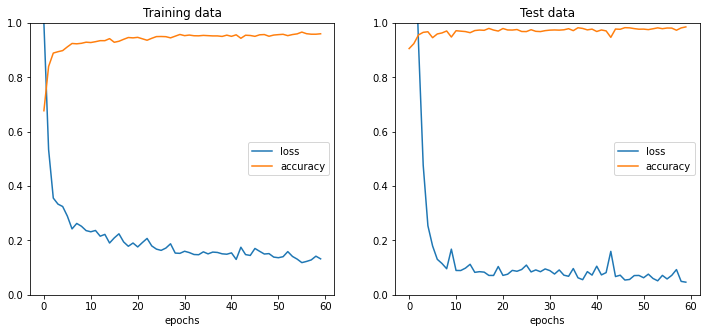

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(122)
plt.plot(history.history['val_loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylim(0,1)
plt.title('Test data')
plt.legend(loc='center right')


plt.subplot(121)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylim(0,1)
plt.title('Training data')
plt.legend(loc='center right')
plt.show()

In [9]:
pred_y = np.argmax(model.predict(test_X/255), axis=1)
test_y = np.argmax(test_y,axis=1)
print('Accuracy:', accuracy_score(test_y, pred_y))
print('F1:', f1_score(test_y, pred_y, average='weighted'))
print('Precision:', precision_score(test_y, pred_y, average='weighted'))
print('Recall:', recall_score(test_y, pred_y, average='weighted'))

Accuracy: 0.9835
F1: 0.9834833980181887
Precision: 0.9835242600252079
Recall: 0.9835


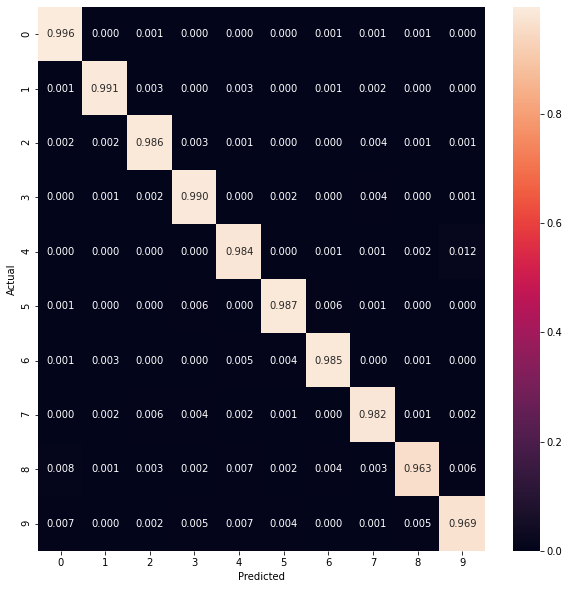

In [10]:
cm = confusion_matrix(test_y, pred_y)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=list(map(str,range(10))), yticklabels=list(map(str,range(10))))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [12]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

